In [1]:
import pandas as pd #
import numpy as np #
#from pandas_profiling import ProfileReport
##
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import * 
from scipy.spatial.distance import euclidean#
from scipy.stats import norm#
from scipy import stats #

import skfuzzy as fuzz

##
from sklearn.utils import shuffle
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors
##
from statsmodels.distributions.empirical_distribution import ECDF
from dtaidistance import dtw
import fastdtw
from fastdtw import fastdtw
import math
import hdbscan
##
from matplotlib import pyplot as plt
from matplotlib import rc
from matplotlib import patches
import plotly as py
import seaborn as sns

import colorlover as cl
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objs as go
import plotly.graph_objects as go
##
import re 
import os
if not os.path.exists("images"): os.mkdir("images")
##
%matplotlib inline 

from s_dbw import SD

import random
np.random.seed(42)

In [2]:
'''
df1 = pd.read_excel('input/37 variables LH300 для кластеризации.xlsx')
target1 = df1.iloc[:,0]
prepared1 = df1.iloc[:,2:]
target1.shape, prepared1.shape
'''

"\ndf1 = pd.read_excel('input/37 variables LH300 для кластеризации.xlsx')\ntarget1 = df1.iloc[:,0]\nprepared1 = df1.iloc[:,2:]\ntarget1.shape, prepared1.shape\n"

In [3]:
df = pd.read_excel('input/37 variables opt200 для кластеризации.xlsx')
target = df.iloc[20:,1].reset_index(drop=True)
prepared = df.iloc[20:,3:-5].reset_index(drop = True)

print(target.shape, prepared.shape,df.loc[20][1])

(159,) (159, 37) Sector_536


In [4]:
prepared.head()

$ANI   $Azimuth  $Azimuth_​2   $beta_​dep  $beta_​poro  $beta_​poro_​2  \
0  0.075705  19.654784    36.923771  2653.271245     0.182576        0.182595   
1  0.084012  21.754500    39.696296  2651.939975     0.183942        0.188524   
2  0.087307  13.723498    35.615067  2650.105265     0.175277        0.184561   
3  0.090472  11.570374    52.569738  2649.447030     0.183000        0.185180   
4  0.087179  10.000000    39.154856  2650.901879     0.179286        0.183558   

   $Corey_​O_​W  $Corey_​water  $cos_​teta  $Fault_​20  ...  \
0      4.387896       1.496824    0.670299    0.251107  ...   
1      4.372040       1.184466    0.692905    0.245404  ...   
2      4.202214       1.347188    0.726394    0.249981  ...   
3      3.949525       1.089036    0.692615    0.217746  ...   
4      4.188361       1.184884    0.640312    0.225488  ...   

   $LN_​gamma_​swl_​2       $Major    $Major_​2     $Minior  $Minior_​2  \
0            3.967589  4375.946413  4234.095475  498.880852  736.605634   
1            3.890138  3485.019517  4109.635690  538.540141  702.136651   
2            4.000000  4862.254502  4378.947862  629.862076  617.554195   
3            3.952158  5625.166398  4816.805766  300.000000  509.151906   
4            3.928962  5041.668728  4085.758417  714.701431  603.814692   

    $Prop_​f  $Shift_​facies  $Shift_​facies_​2  $Vertical  $Vertical_​2  
0  78.721254       -0.851869          -0.511257   6.273848      7.683949  
1  79.284910       -0.895155          -0.438044   6.966612     10.043131  
2  76.289564       -0.685441          -0.219627   7.542791      7.681975  
3  78.742722       -0.641516          -0.686692   3.898135      5.978265  
4  79.565662       -0.742519          -0.191283   4.255669     12.516188  

[5 rows x 37 columns]

In [5]:
prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   $ANI                 159 non-null    float64
 1   $Azimuth             159 non-null    float64
 2   $Azimuth_​2          159 non-null    float64
 3   $beta_​dep           159 non-null    float64
 4   $beta_​poro          159 non-null    float64
 5   $beta_​poro_​2       159 non-null    float64
 6   $Corey_​O_​W         159 non-null    float64
 7   $Corey_​water        159 non-null    float64
 8   $cos_​teta           159 non-null    float64
 9   $Fault_​20           159 non-null    float64
 10  $FWL                 159 non-null    float64
 11  $gamma_​dep          159 non-null    float64
 12  $gamma_​poro         159 non-null    float64
 13  $gamma_​poro_​2      159 non-null    float64
 14  $Krw_​Sorw           159 non-null    float64
 15  $LN_​beta_​perm      159 non-null    flo

In [6]:
prepared.to_numpy()

array([[ 7.57049113e-02,  1.96547838e+01,  3.69237711e+01, ...,
        -5.11257293e-01,  6.27384794e+00,  7.68394943e+00],
       [ 8.40121382e-02,  2.17544999e+01,  3.96962957e+01, ...,
        -4.38044332e-01,  6.96661158e+00,  1.00431311e+01],
       [ 8.73067081e-02,  1.37234975e+01,  3.56150666e+01, ...,
        -2.19626687e-01,  7.54279138e+00,  7.68197481e+00],
       ...,
       [ 1.00000000e-01,  1.22061431e+01,  4.58944112e+01, ...,
         2.45280340e-02,  1.00000000e+00,  1.04065338e+01],
       [ 9.55780184e-02,  1.91047624e+01,  4.46596614e+01, ...,
        -1.86753169e-01,  4.03556535e+00,  1.17469521e+01],
       [ 8.44247244e-02,  2.33150519e+01,  3.96621173e+01, ...,
        -5.74467804e-01,  2.66832553e+00,  1.05245430e+01]])

In [7]:
feature = prepared.iloc[:,7:8].reset_index(drop = True).copy()
feature.head()

$Corey_​water
0       1.496824
1       1.184466
2       1.347188
3       1.089036
4       1.184884

In [8]:
prepared.columns

Index(['$ANI', '$Azimuth', '$Azimuth_​2', '$beta_​dep', '$beta_​poro',
       '$beta_​poro_​2', '$Corey_​O_​W', '$Corey_​water', '$cos_​teta',
       '$Fault_​20', '$FWL', '$gamma_​dep', '$gamma_​poro', '$gamma_​poro_​2',
       '$Krw_​Sorw', '$LN_​beta_​perm', '$LN_​beta_​perm_​2', '$LN_​beta_​sw',
       '$LN_​beta_​sw_​2', '$LN_​beta_​swl', '$LN_​beta_​swl_​2',
       '$LN_​gamma_​perm', '$LN_​gamma_​perm_​2', '$LN_​gamma_​sw',
       '$LN_​gamma_​sw_​2', '$LN_​gamma_​swcr', '$LN_​gamma_​swl',
       '$LN_​gamma_​swl_​2', '$Major', '$Major_​2', '$Minior', '$Minior_​2',
       '$Prop_​f', '$Shift_​facies', '$Shift_​facies_​2', '$Vertical',
       '$Vertical_​2'],
      dtype='object')

In [9]:
#загружаем библиотеку препроцесинга данных эта библиотека автоматически приведет данные к нормальным значениям
scaler = MinMaxScaler()
dataNorm = scaler.fit_transform(feature)

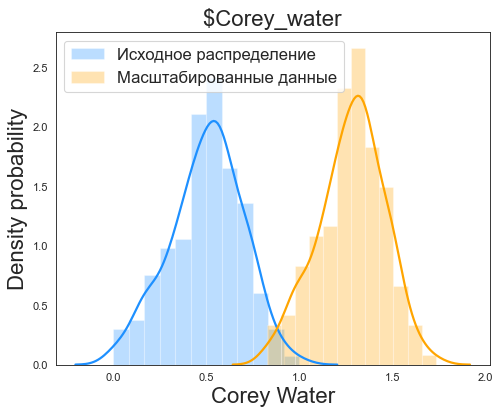

In [10]:

sns.set_style("white")
N = 7

x1 = pd.DataFrame(dataNorm)
x2 = feature

kwargs = dict(hist_kws={'alpha':.3}, kde_kws={'linewidth':2})


plt.figure(figsize=(7,5.5), dpi= 80)
sns.distplot(x1, color="dodgerblue", label="Исходное распределение", **kwargs)
sns.distplot(x2, color="orange", label="Масштабированные данные", **kwargs)
plt.title(prepared.columns[N],fontsize =20)
plt.ylabel('Density probability',fontdict = dict(fontsize = 20))
plt.xlabel('Corey Water',fontdict = dict(fontsize = 20))
plt.legend(fontsize = 15);

# ELBOW METHOD OF DETERMINATION NUMBER OF CLUSTERS

In [28]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from s_dbw import S_Dbw

def elbow(df,highest):
    '''
    Функция строит метрики оценки кластеров
    
    df - pd.DataFrame парметров ГДМ
    highest- верхняя граница колиества кластеров
    
    '''
    range_n_clusters = np.arange(2,highest,1)
    
    coeff, Sum_of_squared_distances, SDbw = [],[],[]
    
    scaler =  MinMaxScaler()
    df = scaler.fit_transform(df)
    
    for n_clusters in range_n_clusters:
        
        clusterer = KMeans(n_clusters=n_clusters,tol=0.01, n_init=500)#,random_state=42)
        cluster_labels = clusterer.fit_predict(df)       
        
        silhouette_avg = silhouette_score(df, cluster_labels)  
        score = S_Dbw(df, 
                      cluster_labels,
                      centers_id=None,
                      method='Halkidi',
                      alg_noise='bind',
                      centr='mean', 
                      nearest_centr=True,                       
                      metric='euclidean')
        #print(score)
        coeff.append(silhouette_avg)
        Sum_of_squared_distances.append(clusterer.inertia_)
        SDbw.append(score)  
        
    
    y1 = coeff
    y2 = Sum_of_squared_distances
    y3 = SDbw
    
    fig = go.Figure()
    modes = 'markers+lines'
    
    fig.add_trace(
        go.Scatter(
            x = range_n_clusters,
            y = y1,
            #showlegend = False,
            name = 'Silhouette Score',
            mode = modes,
            marker = dict(color = 'red'),
             yaxis='y1'
        )
    )
    
    fig.add_trace(
        go.Scatter(
            x = range_n_clusters,
            y = y2,
            #showlegend = False,
            name = 'Sum of squared distances',
            mode = modes,
            marker = dict(color = 'green'),
            yaxis='y2'
        )
    )
    fig.add_trace(
        go.Scatter(
            x = range_n_clusters,
            y = y3,
            #showlegend = False,
            name = 'SD validity index',
            mode = modes,
            marker = dict(color = 'blue'),
            yaxis='y3'
        )
    ) 
    
    fig.update_layout(
        yaxis = dict(
            #title="yaxis title",
            titlefont=dict(color="red"),
            tickfont=dict(color="red")
        ),
        yaxis2 = dict(
            #title="yaxis2 title",
            titlefont=dict(color="green"),
            tickfont=dict(color="green"),
            anchor="free",
            overlaying="y",
            side="right",
            position=1
        ),        
        yaxis3 = dict(
            #title="yaxis3 title",
            titlefont=dict(color="blue"),
            tickfont=dict(color="blue"),
            anchor="free",
            overlaying="y",
            side="right",
            position=0
        ),
    )
    fig.update_layout(
        legend=dict(
            orientation="h",
            yanchor="bottom",
            y=1.02,
            xanchor="right",
            x=1
        )
    )
    
    return fig.show() 
   
        

In [12]:
N = 10
color = list(sns.color_palette(n_colors = N).as_hex())
color_palette = pd.DataFrame([color]).T
color_palette.index += 1

In [13]:
from collections import Counter

In [14]:
from sklearn.preprocessing import RobustScaler

In [15]:
def cc(df,ind_centroids,flag):
    '''
    df - датафрейм после кластеризации 
    ind_cetroids - список индексов центроидных моделей
    '''
    cl = ['центроид кластера '+ str(x+1) for x in range(len(ind_centroids))]   
    if flag == True:
        
        scaler = MinMaxScaler()
        dataNorm = scaler.fit_transform(df)   
        fig = go.Figure()
        for j, jtem in enumerate(df.columns[:-2]):
            input_ = []

            for x in ind_centroids:
                input_.append(dataNorm[x][j]) 

            fig.add_trace(go.Bar(
                x=cl,
                y=input_,
                name = jtem
            ))
            fig.update_layout(barmode='group')
            
        fig.update_layout(title = 'Центроидные модели. Нормированные значения ручек')
        
    else:
        fig = go.Figure()
        for j, jtem in enumerate(df.columns[:-2]):
            input_ = []

            for x in ind_centroids:
                input_.append(df.loc[x][jtem]) 

            fig.add_trace(go.Bar(
                x=cl,
                y=input_,
                name = jtem
            ))
            fig.update_layout(barmode='group')
            
        fig.update_layout(title = 'Центроидные модели. Исходные значения ручек')
    return fig.show()   

In [16]:
def agg(df,id_, metric = 'euclidean'):
    '''
    df - pd.DataFrame features
    n_clusters - указать количество кластеров
    flag - если True, то рисует картинки. если False - то не рисует
    
    '''
    scaler =  RobustScaler()# MinMaxScaler()
    dataNorm = scaler.fit_transform(df)
    
    elbow(df,2,10)
    n_clusters = int(input())
    
    agg = AgglomerativeClustering(n_clusters = n_clusters, affinity=metric, linkage='complete').fit(dataNorm)
    models = pd.DataFrame(id_,columns=['UWI'])
    output = pd.concat([df,pd.DataFrame(agg.labels_ +1,columns=['label']),models],axis=1)
    
    fig1 = px.pie(output,
                  names='label',
                  color = 'label',
                  color_discrete_map = color_palette.loc[:n_clusters].to_dict()[0])
                 
    fig1.update_layout(title='% из общей ('+ str(len(df)) +') выборки в каждом кластере')
    fig1.show()
    
    divided = []     
    for j,jtem in enumerate(np.unique(agg.labels_ +1)):
        divided.append(output[output.label == jtem])  
        
    for i in range(output.shape[1]-1):
        
        feature = output.columns[i]
        fig = go.Figure()
        #fig = make_subplots(rows=1, cols=2)
        
        for k in range(len(divided)):  
            #print(divided[k].columns[i])
            ecdf = ECDF(divided[k].iloc[:,i].values)           
           
            fig.add_trace(
                go.Scatter(x=ecdf.x,
                           y=ecdf.y,
                           mode='markers',
                           name = str(k+1),
                           marker = dict(size = 4,color = color_palette.loc[:n_clusters].to_dict()[0][k+1]),
                          ),
                           
            ) 

            
            fig.update_xaxes(title = 'Значение параметра '+ str(divided[k].columns[i]))
            fig.update_yaxes(title = 'Вероятность, доля ')
            fig.update_layout(title = 'Empirical Cumulative Distribution Function of ' + str(divided[k].columns[i]))
            #fig.write_image('images/'+'Empirical Cumulative Distribution Function of ' + str(divided[k].columns[i])+'.jpeg')
                      
        fig.show()
            
    closest = [] 
    for cl in range(n_clusters):
        
        df_where_only_i_cluster = output[output.label == cl+1].drop(columns=output.columns[-1])
        centroid = df_where_only_i_cluster.mean()
        
        centroid = np.array(centroid).reshape(1, -1)
        centroid, _ = pairwise_distances_argmin_min(centroid,df_where_only_i_cluster)
        closest.append(df_where_only_i_cluster.iloc[centroid].index[0])
        
    print ('Имена центроидных моделей')
    for x in closest:        
        print(id_[x])
        
    return output, closest

In [17]:
from sklearn.metrics import pairwise_distances_argmin_min
def km(df,id_):
    '''
    df - нормализованный np.array 
    names - список идентификаторов для датасета 
    n_clusters - указать количество кластеров
    flag - если True, то рисует картинки. если False - то не рисует
    
    '''    
    #загружаем библиотеку препроцесинга данных эта библиотека автоматически приведет данные к нормальным значениям
    
    scaler =  MinMaxScaler()
    
    dataNorm = scaler.fit_transform(df)
    
    elbow(df,10)
    n_clusters = int(input())
    km = KMeans(n_clusters = n_clusters,tol=0.01, n_init=500, random_state=42).fit(dataNorm)   
    
    closest, _ = pairwise_distances_argmin_min(km.cluster_centers_, dataNorm)
    print(closest)
    print ('Имена центроидных моделей')
    for x in closest:        
        print(id_[x])
        
    models = pd.DataFrame(id_,columns=['UWI'])
    output = pd.concat([df,pd.DataFrame(km.labels_ +1,columns=['label']),models],axis=1)
    
    cl = ['Кластер #'+ str(x+1) for x in range(len(closest))]
   # print(Counter(model))
    
    
    fig1 = px.pie(output,
                  names='label',
                  color = 'label',
                  color_discrete_map = color_palette.loc[:n_clusters].to_dict()[0])
                 
    fig1.update_layout(title='% из общей ('+ str(len(df)) +') выборки в каждом кластере')
    fig1.show()
    
    divided = []     
    for j,jtem in enumerate(np.unique(km.labels_ +1)):
        divided.append(output[output.label == jtem])  
    
    for i in range(output.shape[1]-1):        
        feature = output.columns[i]  
        
        fig = make_subplots(rows=1, cols=2) 
        
        for k in range(len(divided)):  
            #print(divided[k].columns[i])
            ecdf = ECDF(divided[k].iloc[:,i].values)           
           
            fig.add_trace(
                go.Scatter(
                    x=ecdf.x,
                    y=ecdf.y,
                    mode='markers',
                    legendgroup="group",
                    #name = str(k+1),
                    marker = dict(size = 4,color = color_palette.loc[:n_clusters].to_dict()[0][k+1] ),
                ),
                row = 1, col = 1
            )
            #x_ = 
            #y_ = 
            fig.add_trace(
                go.Scatter(
                    x = [divided[k].loc[closest[k]][feature]],
                    y = [ecdf.y[list(ecdf.x).index(divided[k].loc[closest[k]][feature])]],
                    mode='markers',
                    showlegend = False,
                    marker_symbol='x',
                    marker = dict(size = 15,                                  
                                  color = color_palette.loc[:n_clusters].to_dict()[0][k+1] ),
                    ),
                    row = 1, col = 1
                )             
              
            fig.add_trace(
                go.Box(
                    name = cl[k],
                    y = ecdf.x,
                    boxpoints='suspectedoutliers',
                    legendgroup="group",   
                    showlegend=False,
                    marker_color = color_palette.loc[:n_clusters].to_dict()[0][k+1],
                ),
                row = 1, col =2
            )
            #print(divided[k].loc[closest[k]][feature],ecdf.y[list(ecdf.x).index(divided[k].loc[closest[k]][feature])])
            fig.add_trace(
                go.Scatter(
                    x = [cl[k]],
                    y = [divided[k].loc[closest[k]][feature]],
                    mode='markers',
                    
                    showlegend = False,
                    marker_symbol='x',
                    marker = dict(size = 15,                                  
                                  color = color_palette.loc[:n_clusters].to_dict()[0][k+1] ),
                    ),
                    row = 1, col = 2
                )             

            #fig.update_xaxes(title = 'Значение параметра '+ str(divided[k].columns[i]))
            fig.update_layout(
                xaxis1=dict(title = "Значение параметра"),
                xaxis2=dict(title = "Группа данных"),
                yaxis1=dict(title="Доля данных"),
                yaxis2=dict(title="Значение параметра"))
            fig.update_layout(title = 'Empirical Cumulative Distribution Function and Box-plots for each cluster ' + str(divided[k].columns[i]))
            #fig.write_image('images/'+'Empirical Cumulative Distribution Function of ' + str(divided[k].columns[i])+'.jpeg')

        fig.show()
        
    return output,closest,km.cluster_centers_,divided
    #return divided

In [18]:
from sklearn.metrics import pairwise_distances_argmin_min
def cm(df,id_, m=1.5):
    '''
    df - нормализованный np.array 
    names - список идентификаторов для датасета 
    n_clusters - указать количество кластеров
    flag - если True, то рисует картинки. если False - то не рисует
    
    '''    
    #загружаем библиотеку препроцесинга данных эта библиотека автоматически приведет данные к нормальным значениям
    
    scaler =  MinMaxScaler()
    
    dataNorm = scaler.fit_transform(df)
    
    elbow(df,10)
    n_clusters = int(input())
    cntr, u_orig, _, _, _, _, fpc = fuzz.cluster.cmeans(df.T, n_clusters, m=m, error=0.1, maxiter=10000, metric='cosine')
    closest = []
#     print(np.unique(u_orig.argmax(axis=0)))
    try:
        for j in range(n_clusters):
            closest.append(pd.DataFrame(df)[u_orig.argmax(axis=0) == j].index[pairwise_distances_argmin_min([cntr[j]], df[u_orig.argmax(axis=0) == j])[0]])
        closest = np.stack(closest).reshape(-1)
    except:
        return [u_orig]
    print(closest)
    print ('Имена центроидных моделей')
    for x in closest:        
        print(id_[x])
        
    models = pd.DataFrame(id_,columns=['UWI'])
    output = pd.concat([df,pd.DataFrame(u_orig.argmax(axis=0)+1,columns=['label']),models],axis=1)
    
    cl = ['Кластер #'+ str(x+1) for x in range(len(closest))]
   # print(Counter(model))
    
    
    fig1 = px.pie(output,
                  names='label',
                  color = 'label',
                  color_discrete_map = color_palette.loc[:n_clusters].to_dict()[0])
                 
    fig1.update_layout(title='% из общей ('+ str(len(df)) +') выборки в каждом кластере')
    fig1.show()
    
    divided = []     
    for j,jtem in enumerate(np.unique(u_orig.argmax(axis=0) +1)):
        divided.append(output[output.label == jtem])  
    
    for i in range(output.shape[1]-1):        
        feature = output.columns[i]  
        
        fig = make_subplots(rows=1, cols=2) 
        
        for k in range(len(divided)):  
            #print(divided[k].columns[i])
            ecdf = ECDF(divided[k].iloc[:,i].values)           
           
            fig.add_trace(
                go.Scatter(
                    x=ecdf.x,
                    y=ecdf.y,
                    mode='markers',
                    legendgroup="group",
                    #name = str(k+1),
                    marker = dict(size = 4,color = color_palette.loc[:n_clusters].to_dict()[0][k+1] ),
                ),
                row = 1, col = 1
            )
            #x_ = 
            #y_ = 
            fig.add_trace(
                go.Scatter(
                    x = [divided[k].loc[closest[k]][feature]],
                    y = [ecdf.y[list(ecdf.x).index(divided[k].loc[closest[k]][feature])]],
                    mode='markers',
                    showlegend = False,
                    marker_symbol='x',
                    marker = dict(size = 15,                                  
                                  color = color_palette.loc[:n_clusters].to_dict()[0][k+1] ),
                    ),
                    row = 1, col = 1
                )             
              
            fig.add_trace(
                go.Box(
                    name = cl[k],
                    y = ecdf.x,
                    boxpoints='suspectedoutliers',
                    legendgroup="group",   
                    showlegend=False,
                    marker_color = color_palette.loc[:n_clusters].to_dict()[0][k+1],
                ),
                row = 1, col =2
            )
            #print(divided[k].loc[closest[k]][feature],ecdf.y[list(ecdf.x).index(divided[k].loc[closest[k]][feature])])
            fig.add_trace(
                go.Scatter(
                    x = [cl[k]],
                    y = [divided[k].loc[closest[k]][feature]],
                    mode='markers',
                    
                    showlegend = False,
                    marker_symbol='x',
                    marker = dict(size = 15,                                  
                                  color = color_palette.loc[:n_clusters].to_dict()[0][k+1] ),
                    ),
                    row = 1, col = 2
                )             

            #fig.update_xaxes(title = 'Значение параметра '+ str(divided[k].columns[i]))
            fig.update_layout(
                xaxis1=dict(title = "Значение параметра"),
                xaxis2=dict(title = "Группа данных"),
                yaxis1=dict(title="Доля данных"),
                yaxis2=dict(title="Значение параметра"))
            fig.update_layout(title = 'Empirical Cumulative Distribution Function and Box-plots for each cluster ' + str(divided[k].columns[i]))
            #fig.write_image('images/'+'Empirical Cumulative Distribution Function of ' + str(divided[k].columns[i])+'.jpeg')

        fig.show()
        
    return output,closest,dataNorm[closest],divided
    #return divided
    
    
    
def cm_select(df,id_):
    '''
    df - нормализованный np.array 
    names - список идентификаторов для датасета 
    n_clusters - указать количество кластеров
    flag - если True, то рисует картинки. если False - то не рисует
    
    '''    
    #загружаем библиотеку препроцесинга данных эта библиотека автоматически приведет данные к нормальным значениям
    
    scaler =  MinMaxScaler()
    
    dataNorm = scaler.fit_transform(df)
    
    elbow(df,10)
    n_clusters = int(input())
    cmeans_df = pd.DataFrame()
    
    tsne = TSNE(n_components = 2,
                learning_rate=100,
                early_exaggeration=12.0,
                metric = 'cosine',
                perplexity= 50,
                n_iter = 1000,            
                random_state =42)

    tsne_model=tsne.fit_transform(dataNorm)
    x_axis=tsne_model[:,0]
    y_axis=tsne_model[:,1]
    
    for k,m in enumerate([1.001 + 0.1*i for i in  range(25)]):
        cntr, u_orig, _, _, _, _, fpc = fuzz.cluster.cmeans(dataNorm.T, n_clusters, m=m, error=0.1, maxiter=10000, metric='cosine')
        closest = []
    #     print(np.unique(u_orig.argmax(axis=0)))
        try:
            for j in range(n_clusters):
                closest.append(pd.DataFrame(dataNorm)[u_orig.argmax(axis=0) == j].index[pairwise_distances_argmin_min([cntr[j]], df[u_orig.argmax(axis=0) == j])[0]])
            closest = np.stack(closest).reshape(-1)
        except:
            return [u_orig]

        models = pd.DataFrame(id_,columns=['UWI'])
        output = pd.concat([df,pd.DataFrame(u_orig.argmax(axis=0)+1,columns=['label']),models],axis=1)
        
        dist = [np.linalg.norm(dataNorm[closest[0]] - dataNorm[closest[1]]), np.linalg.norm(dataNorm[closest[0]] - dataNorm[closest[2]]), np.linalg.norm(dataNorm[closest[1]] - dataNorm[closest[2]])]
        cmeans_df = cmeans_df.append([[m, closest, fpc, max(dist), np.min(dist)], ])
        print()
        if k%5==0:
#             print(item + ' ' + str(perp) + ' ' + str(output_cmeans[2].mean()))
            fig = go.Figure()
            fig.add_trace(
                go.Scatter(
                    x = x_axis,
                    y = y_axis,
                    mode = 'markers',
                    marker= dict(color = output.label)
                )
            )
            fig.add_trace(
            go.Scatter(
                x = x_axis[closest],
                y = y_axis[closest],
                mode = 'markers',
                marker = dict(symbol = 'x-open-dot', 
                    size = 30,
        #             line_color='black',
                    color='black',
                    )
            ))

            fig.update_layout(title = 'cosine' + ' ' + str(50) + ' ' + str(fpc))
            fig.show()
    cmeans_df.columns = ['m', 'centroids', 'fpc', 'max euclidean dist', 'mean euclidean dist']
    print(cmeans_df)
    fig = px.line(cmeans_df, x='m', y='fpc', title='Четкость описания данных')
    fig.show()

In [39]:
from sklearn.cluster import SpectralClustering

def spec(df,id_):
    '''
    df - нормализованный np.array 
    names - список идентификаторов для датасета 
    n_clusters - указать количество кластеров
    flag - если True, то рисует картинки. если False - то не рисует
    
    '''    
    #загружаем библиотеку препроцесинга данных эта библиотека автоматически приведет данные к нормальным значениям
    
    scaler =  MinMaxScaler()
    
    dataNorm = scaler.fit_transform(df)
    
    elbow(df,10)
    n_clusters = int(input())
    spec = SpectralClustering(n_clusters = n_clusters, assign_labels='discretize', random_state=42).fit(dataNorm)   
    
    models = pd.DataFrame(id_,columns=['UWI'])
    output = pd.concat([df,pd.DataFrame(spec.labels_ +1,columns=['label']),models],axis=1)
    
    closest = [] 
    for cl in range(n_clusters):
        
        df_where_only_i_cluster = output[output.label == cl+1].drop(columns=output.columns[-1])
        centroid = df_where_only_i_cluster.mean()
        
        centroid = np.array(centroid).reshape(1, -1)
        centroid, _ = pairwise_distances_argmin_min(centroid,df_where_only_i_cluster)
        closest.append(df_where_only_i_cluster.iloc[centroid].index[0])
        
    print ('Имена центроидных моделей')
    for x in closest:        
        print(id_[x])
    
    cl = ['Кластер #'+ str(x+1) for x in range(n_clusters)]
                  names='label',
                  color = 'label',
                  color_discrete_map = color_palette.loc[:n_clusters].to_dict()[0])
                 
    fig1.update_layout(title='% из общей ('+ str(len(df)) +') выборки в каждом кластере')
    fig1.show()
    
    divided = []     
    for j,jtem in enumerate(np.unique(spec.labels_ +1)):
        divided.append(output[output.label == jtem])  
    
    for i in range(output.shape[1]-1):        
        feature = output.columns[i]  
        
        fig = make_subplots(rows=1, cols=2) 
        
        for k in range(len(divided)):  
            #print(divided[k].columns[i])
            ecdf = ECDF(divided[k].iloc[:,i].values)           
           
            fig.add_trace(
                go.Scatter(
                    x=ecdf.x,
                    y=ecdf.y,
                    mode='markers',
                    legendgroup="group",
                    #name = str(k+1),
                    marker = dict(size = 4,color = color_palette.loc[:n_clusters].to_dict()[0][k+1] ),
                ),
                row = 1, col = 1
            )
            fig.add_trace(
                go.Scatter(
                    x = [divided[k].loc[closest[k]][feature]],
                    y = [ecdf.y[list(ecdf.x).index(divided[k].loc[closest[k]][feature])]],
                    mode='markers',
                    showlegend = False,
                    marker_symbol='x',
                    marker = dict(size = 15,                                  
                                  color = color_palette.loc[:n_clusters].to_dict()[0][k+1] ),
                    ),
                    row = 1, col = 1
                )             
              
            fig.add_trace(
                go.Box(
                    name = cl[k],
                    y = ecdf.x,
                    boxpoints='suspectedoutliers',
                    legendgroup="group",   
                    showlegend=False,
                    marker_color = color_palette.loc[:n_clusters].to_dict()[0][k+1],
                ),
                row = 1, col =2
            )
            #print(divided[k].loc[closest[k]][feature],ecdf.y[list(ecdf.x).index(divided[k].loc[closest[k]][feature])])
            fig.add_trace(
                go.Scatter(
                    x = [cl[k]],
                    y = [divided[k].loc[closest[k]][feature]],
                    mode='markers',
                    
                    showlegend = False,
                    marker_symbol='x',
                    marker = dict(size = 15,                                  
                                  color = color_palette.loc[:n_clusters].to_dict()[0][k+1] ),
                    ),
                    row = 1, col = 2
                )             

            #fig.update_xaxes(title = 'Значение параметра '+ str(divided[k].columns[i]))
            fig.update_layout(
                xaxis1=dict(title = "Значение параметра"),
                xaxis2=dict(title = "Группа данных"),
                yaxis1=dict(title="Доля данных"),
                yaxis2=dict(title="Значение параметра"))
            fig.update_layout(title = 'Empirical Cumulative Distribution Function and Box-plots for each cluster ' + str(divided[k].columns[i]))
            #fig.write_image('images/'+'Empirical Cumulative Distribution Function of ' + str(divided[k].columns[i])+'.jpeg')

        fig.show()
        
    return output, closest,divided


In [40]:
inital_output = spec(prepared,target)

4
Имена центроидных моделей
Sector_599
Sector_640
Sector_608
Sector_663


In [34]:
inital_output[0]

$ANI   $Azimuth  $Azimuth_​2   $beta_​dep  $beta_​poro  \
0    0.075705  19.654784    36.923771  2653.271245     0.182576   
1    0.084012  21.754500    39.696296  2651.939975     0.183942   
2    0.087307  13.723498    35.615067  2650.105265     0.175277   
3    0.090472  11.570374    52.569738  2649.447030     0.183000   
4    0.087179  10.000000    39.154856  2650.901879     0.179286   
..        ...        ...          ...          ...          ...   
154  0.084229  19.023086    42.262845  2656.245226     0.186269   
155  0.100000  17.131213    43.457780  2655.998688     0.180637   
156  0.100000  12.206143    45.894411  2656.055428     0.184055   
157  0.095578  19.104762    44.659661  2655.642867     0.184211   
158  0.084425  23.315052    39.662117  2654.877920     0.183029   

     $beta_​poro_​2  $Corey_​O_​W  $Corey_​water  $cos_​teta  $Fault_​20  ...  \
0          0.182595      4.387896       1.496824    0.670299    0.251107  ...   
1          0.188524      4.372040       1.184466    0.692905    0.245404  ...   
2          0.184561      4.202214       1.347188    0.726394    0.249981  ...   
3          0.185180      3.949525       1.089036    0.692615    0.217746  ...   
4          0.183558      4.188361       1.184884    0.640312    0.225488  ...   
..              ...           ...            ...         ...         ...  ...   
154        0.188341      4.621297       1.351773    0.713123    0.206920  ...   
155        0.187916      4.523277       1.347730    0.709310    0.420069  ...   
156        0.186088      4.669953       0.848243    0.613565    0.264845  ...   
157        0.184948      4.445599       1.276529    0.651802    0.368227  ...   
158        0.184490      4.418180       1.462166    0.729881    0.287089  ...   

       $Major_​2     $Minior   $Minior_​2   $Prop_​f  $Shift_​facies  \
0    4234.095475  498.880852   736.605634  78.721254       -0.851869   
1    4109.635690  538.540141   702.136651  79.284910       -0.895155   
2    4378.947862  629.862076   617.554195  76.289564       -0.685441   
3    4816.805766  300.000000   509.151906  78.742722       -0.641516   
4    4085.758417  714.701431   603.814692  79.565662       -0.742519   
..           ...         ...          ...        ...             ...   
154  6072.385715  655.415648  1153.643407  79.088456       -0.525526   
155  5445.610068  756.854078  1088.757214  77.771082       -0.564297   
156  5129.073537  720.261835   897.797753  76.868932       -0.697661   
157  6219.235931  630.194867  1084.010379  75.468844       -0.821518   
158  6744.293907  622.642845  1054.911343  75.307701       -0.744410   

     $Shift_​facies_​2  $Vertical  $Vertical_​2  label  UWI  
0            -0.511257   6.273848      7.683949      1  NaN  
1            -0.438044   6.966612     10.043131      1  NaN  
2            -0.219627   7.542791      7.681975      1  NaN  
3            -0.686692   3.898135      5.978265      1  NaN  
4            -0.191283   4.255669     12.516188      1  NaN  
..                 ...        ...           ...    ...  ...  
154          -0.447618   5.513406     11.899136      4  NaN  
155          -0.045785   2.959413     11.825613      2  NaN  
156           0.024528   1.000000     10.406534      2  NaN  
157          -0.186753   4.035565     11.746952      2  NaN  
158          -0.574468   2.668326     10.524543      4  NaN  

[159 rows x 39 columns]

In [22]:
rates = pd.read_excel('Export2.xlsx',header=None)
rates

FileNotFoundError: [Errno 2] No such file or directory: 'Export2.xlsx'

In [23]:
rates82 = pd.read_excel('gdhm2021/Sector FLPT, FOPT, FLPR, FOPR.xlsx',header=1)
period = rates82.X.tolist()[2:]
rates82 = rates82.dropna()

In [24]:
prepared_rates82 = pd.DataFrame(columns=['UWI','hlpc','hlpr','hopc','hopr','lpc','lpr','opc','opr'])
count = 0

for i in range(1,rates82.shape[1],8):
    #print(i,i+8)
    
    df = rates82.iloc[:,i:i+8]    
    name = df.loc[0][1].split(sep=',')[0]
    #print(name)
    #print(df.loc[0][1].split(sep=',')[0])
    
    prepared_rates82.at[count,'UWI'] =  int(name[7:])    
    prepared_rates82.at[count,'hlpc'] = df.iloc[2:,0:1].values.reshape(1,-1)[0].tolist()
    prepared_rates82.at[count,'hlpr'] = df.iloc[2:,1:2].values.reshape(1,-1)[0].tolist()
    prepared_rates82.at[count,'hopc'] = df.iloc[2:,2:3].values.reshape(1,-1)[0].tolist()
    prepared_rates82.at[count,'hopr'] = df.iloc[2:,3:4].values.reshape(1,-1)[0].tolist()
    prepared_rates82.at[count,'lpc'] =  df.iloc[2:,4:5].values.reshape(1,-1)[0].tolist()
    prepared_rates82.at[count,'lpr'] =  df.iloc[2:,5:6].values.reshape(1,-1)[0].tolist()
    prepared_rates82.at[count,'opc'] =  df.iloc[2:,6:7].values.reshape(1,-1)[0].tolist()
    prepared_rates82.at[count,'opr'] =  df.iloc[2:,7:8].values.reshape(1,-1)[0].tolist()
    count +=1
prepared_rates82 = prepared_rates82.sort_values(by='UWI').reset_index(drop = True)
prepared_rates82 = prepared_rates82.drop(index = 82)
print(prepared_rates82.shape)
prepared_rates82.head()

(82, 9)


UWI                                               hlpc  \
0   1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1   2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2   3  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3   4  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4   5  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                                                hlpr  \
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                                                hopc  \
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                                                hopr  \
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                                                 lpc  \
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                                                 lpr  \
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                                                 opc  \
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                                                 opr  
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
3  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
4  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...

In [25]:
def rates_visual(period,rates,type_prod,output,centroids,color_palette): 
    
    '''
    period - даты;
    rates - датафрейм параметров добычи;
    output - массив с ручками со столбцом номера кластера и идентификатором скважины;
    type_prod - наименование параметра добычи, который нужно отобразить
                Примеры: 'hlpc','hlpr','hopc','hopr','lpc','lpr','opc','opr';
    color_palette- датафрейм цветов для каждого кластера;
    '''
    #print(color_palette)    
    fig = go.Figure()  
    fig1 = go.Figure()
    start = "\033[1m"
    end = "\033[0;0m"
    color_center = []
    for i in range(rates.shape[0]):
        for j in range(len(color_palette)):
            if output.label[i] == color_palette.loc[j][0]:
                color = color_palette.loc[j][1]
                color_center.append(color)
                #print(color)
                break
        
        
        fig.add_trace(
            go.Scatter(
                showlegend = False,
                x=period,
                y=prepared_rates82[type_prod][i],
                opacity = 0.5,
                #name = str(indexes_data.loc[i][0]),   
                name = 'Cluster '+str(color_palette.loc[j][0]),
                mode= "lines",
                line = dict(color = color,width = 0.8),
            ))
    #print(len(color_center), len(prepared_rates82))
    for c in centroids:
        #print(c)
        fig1.add_trace(
                go.Scatter(
                    showlegend = True,
                    x=period,
                    opacity = 0.9,
                    name = 'model ' + str(prepared_rates82['UWI'][c]),
                    y=prepared_rates82[type_prod][c],
                    #name = str(indexes_data.loc[i][0]),
                    mode= "lines",
                    line = dict(color = color_center[c],width = 5),
                ))   
    for k in range(rates.shape[0]):
        #print(i)
        fig1.add_trace(
            go.Scatter(
                showlegend = False,
                opacity = 0.2,
                x=period,
                y=prepared_rates82[type_prod][k],
                #name = str(indexes_data.loc[i][0]),   
            
                mode= "lines",
                line = dict(color = 'grey',width = 1),
            ))      
    fig1.update_layout( title= 'Параметр добычи ' + str(type_prod)+' для центроидных моделей кластеров',
                         xaxis_title="Период добычи",
                         yaxis_title=str(type_prod),
                         legend_title="Имена моделей"
                        )
    fig.update_layout( title= 'Параметр добычи ' + str(type_prod)+' в зависимости от номера кластера',
                         xaxis_title="Период добычи",
                         yaxis_title=str(type_prod)                         
                        )
    
    return fig.show(),fig1.show()    

In [ ]:
rates_visual(period,prepared_rates82,'opr',output_initial[0],output_initial[1],color_palette)

In [ ]:
#PCA

In [ ]:
pca = PCA(n_components=15)
scaler = MinMaxScaler()
x = scaler.fit_transform(prepared)

In [ ]:
pca.fit(x)

In [ ]:
z = pca.transform(x)

In [ ]:
x_ = x - x.mean(axis=0)

In [ ]:
x_.dot(pca.components_.T)

In [ ]:
sum(pca.explained_variance_ratio_)

In [ ]:
var = (pca.explained_variance_ratio_.astype(list))*100
len_var = [i+1 for i in range(len(var))]
cs = var.cumsum()

variance = pd.DataFrame ()
variance['x']= len_var
variance['y'] = var
variance['y_cum'] = cs
variance


trace1 = dict(
    type='bar',
    x=variance['x'],
    y=variance['y'],
    name='Individual'
)

trace2 = dict(
    type='scatter',
    x=variance['x'], 
    y=variance['y_cum'],
    name='Cumulative'
)

data = [trace1, trace2]

layout=dict(
    title='Explained variance by different principal components',
    yaxis=dict(
        title='Explained variance in percent'
    ),
    xaxis = dict(
        title = 'Principal components'
    ),
    annotations=list([
        dict(
            x=1.16,
            y=1.05,
            xref='paper',
            yref='paper',
            text='Explained Variance',
            showarrow=False,
        )
    ])
)


fig = go.Figure (data=data, layout = layout)
fig.show()

In [ ]:
output_PCA = km(pd.DataFrame(z),target)

In [ ]:
cc(output_PCA[0],output_PCA[1],True)

In [ ]:
rates_visual(period,prepared_rates82,'opr',output_PCA[0],output_PCA[1],color_palette)

# TSNE

In [26]:
metrics = ['braycurtis',
           'canberra',
           'chebyshev',
           'cityblock',
           'correlation',
           'cosine',
           'dice',
           'euclidean',
           'hamming',
           'jaccard',
           #'jensenshannon',
           'kulsinski',
           #'mahalanobis',
           'matching',
           'minkowski',
           'rogerstanimoto',
           'russellrao',
           #'seuclidean',
           #'sokalmichene',
           'sokalsneath',
           'sqeuclidean',
           #'yule'
          ]

In [41]:
metrics = ['euclidean','cosine','hamming']

In [45]:
scaler = MinMaxScaler()
dataNorm = scaler.fit_transform(prepared)
inital_output = spec(prepared,target)

for i,item in enumerate(metrics):    
    tsne = TSNE(n_components = 2,
                learning_rate = 2,
                early_exaggeration=8.0,
                metric = item,
                perplexity = 5,
                n_iter = 1000,            
                random_state =42)
    
    tsne_model=tsne.fit_transform(dataNorm)
        
    x_axis=tsne_model[:,0]
    y_axis=tsne_model[:,1]       
    
    fig = go.Figure()
    fig.add_trace(
        go.Scatter(
            x = x_axis,
            y = y_axis,        
            mode = 'markers', 
            showlegend=False,
            marker = dict(color = inital_output[0].label)
        )
    )
    
    fig.add_trace(
        go.Scatter(
            x = x_axis[inital_output[1]],
            y = y_axis[inital_output[1]],
            mode = 'markers',
            showlegend=False,
            marker = dict(color = 'green', symbol = 'x', size = 15)
        )
    )
    
    fig.update_layout(title = 'TSNE space, ' + item +' metric')
    fig.show()
    

4
Имена центроидных моделей
Sector_599
Sector_640
Sector_608
Sector_663


In [29]:
for i,item in enumerate(metrics):   

    tsne_model=tsne.fit_transform(dataNorm)
    x_axis=tsne_model[:,0]
    y_axis=tsne_model[:,1]    
    
    #output_TSNE = km(pd.DataFrame(tsne_model),target,True)   
    
    fig = go.Figure()
    fig.add_trace(
        go.Scatter(
            x = x_axis,
            y = y_axis,        
            mode = 'markers',           
            marker = dict(color = inital_output[0].label)
        )
    )
    fig.update_layout(title = 'TSNE space, metric is ' + item)
    fig.show()    

In [ ]:
rates_visual(period,prepared_rates82,'opr',output_TSNE[0],output_TSNE[1],color_palette)

In [30]:
for i,item in enumerate(metrics):
    
    tsne = TSNE(n_components = 2,
                learning_rate=200,
                early_exaggeration=12.0,
                metric = item,
                perplexity= 45,
                n_iter = 500,            
                random_state =42)
    
    tsne_model=tsne.fit_transform(dataNorm)
    x_axis=tsne_model[:,0]
    y_axis=tsne_model[:,1]
    
    fig = go.Figure()
    fig.add_trace(
        go.Scatter(
            x = x_axis,
            y = y_axis,
            mode = 'markers',
            marker= dict(color = output_TSNE[0].label)
        )
    )
    fig.update_layout(title = item)
    fig.show()

NameError: name 'output_TSNE' is not defined

# UMAP

In [29]:
import umap.umap_ as umap

ModuleNotFoundError: No module named 'numba.experimental.structref'

In [25]:
!pip install numba --upgrade --ignore-installed --user --no-warn-script-location

  Using cached numba-0.53.1-cp38-cp38-win_amd64.whl (2.3 MB)
  Using cached llvmlite-0.36.0-cp38-cp38-win_amd64.whl (16.0 MB)
  Using cached numpy-1.21.1-cp38-cp38-win_amd64.whl (14.0 MB)
  Using cached setuptools-57.4.0-py3-none-any.whl (819 kB)


In [28]:
!pip install umap_learn --user

Processing c:\users\miroshniksa\appdata\local\pip\cache\wheels\95\85\b7\b4b7040e49367b6d1505d7e8fb57e3e79b22fa6ac26f72520b\umap_learn-0.5.1-py3-none-any.whl


In [20]:
!pip uninstall -y umap

Found existing installation: umap 0.1.1

ERROR: Exception:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3.8\lib\shutil.py", line 788, in move
    os.rename(src, real_dst)
PermissionError: [WinError 5] Отказано в доступе: 'c:\\programdata\\anaconda3.8\\lib\\site-packages\\umap-0.1.1.dist-info\\' -> 'C:\\ProgramData\\Anaconda3.8\\Lib\\site-packages\\~map-0.1.1.dist-info'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3.8\lib\site-packages\pip\_internal\cli\base_command.py", line 188, in _main
    status = self.run(options, args)
  File "C:\ProgramData\Anaconda3.8\lib\site-packages\pip\_internal\commands\uninstall.py", line 85, in run
    uninstall_pathset = req.uninstall(
  File "C:\ProgramData\Anaconda3.8\lib\site-packages\pip\_internal\req\req_install.py", line 676, in uninstall
    uninstalled_pathset.remove(auto_confirm, verbose)
  File "C:\ProgramData\Anaconda3.8\lib\site-packages\pip\_internal\req\req_uninstall.py


Uninstalling umap-0.1.1:


In [ ]:
metrics = ['euclidean',
           'manhattan',
           'chebyshev',
           'minkowski',
           'canberra',
           #'braycurtis',
           #'mahalanobis',
           #'minkowski',
           #'seuclidean',
           'cosine',
           'correlation',
           #'haversine',
           'hamming',
           'jaccard',
           'dice',
           #'russelrao',
           'kulsinski',
           #'ll_dirichlet',
           'hellinger',
           'rogerstanimoto',
           'sokalmichener',
           'sokalsneath',
           'yule'
          ]


In [ ]:
metrics = ['euclidean','cosine','hamming']

In [ ]:
for i,item in enumerate(metrics):
    scaler = MinMaxScaler()
    dataNorm = scaler.fit_transform(prepared)
    UM = umap.UMAP(n_neighbors=5,                   
                   metric= item,
                   random_state=42,
                   min_dist=0.1,
                   learning_rate=1,                   
                   densmap = False,
                   n_epochs = 1000).fit_transform(dataNorm)
    
    inital_output = km(pd.DataFrame(UM),target)
    x_axis=UM[:,0]
    y_axis=UM[:,1]    

    
    fig = go.Figure()
    fig.add_trace(
        go.Scatter(
            x = x_axis,
            y = y_axis,
            mode = 'markers', 
            marker = dict(color = inital_output[0].label)
            
        )
    )
    fig.add_trace(
        go.Scatter(
            x = x_axis[inital_output[1]],
            y = y_axis[inital_output[1]],
            mode = 'markers',
            showlegend=False,
            marker = dict(color = 'green', symbol = 'x', size = 15)
        )
    )
    fig.update_layout(title = 'UMAP space, metric is ' + item)
    fig.show()

In [ ]:
for i,item in enumerate(metrics):
    scaler = MinMaxScaler()
    dataNorm = scaler.fit_transform(prepared)
    
    x_axis=UM[:,0]
    y_axis=UM[:,1]
    
    output_umap = km(pd.DataFrame(UM),target,True)  
    
    fig = go.Figure()
    fig.add_trace(
        go.Scatter(
            x = x_axis,
            y = y_axis,
            mode = 'markers',
            marker = dict(color = output_umap.label)
        )
    )
    fig.update_layout(title = item)
    fig.show()

In [ ]:
rates_visual(period,prepared_rates82,'opr',output_umap[0],output_umap[1],color_palette)

In [ ]:
for i,item in enumerate(metrics):
    UM = umap.UMAP(n_neighbors=5,
                   metric= item,
                   random_state=42,
                   min_dist=0.1,
                   learning_rate=.90,
                   
                   densmap = True,
                   n_epochs = 200).fit_transform(dataNorm)
    x_axis=UM[:,0]
    y_axis=UM[:,1]

    fig = go.Figure()
    fig.add_trace(
        go.Scatter(
            x = x_axis,
            y = y_axis,
            mode = 'markers',
            marker = dict(color = output_umap[0].label)
        )
    )
    fig.update_layout(title = item)
    fig.show()

In [ ]:
metrics = ['euclidean',
           'manhattan',           
           'hamming',          
          ]

In [ ]:
import pacmap as Pacmap

In [ ]:
metrics

In [ ]:
inital_output[0].label.unique()

In [ ]:
#output_pacmap = agg(pacmap_model,3,False)

for i,item in enumerate(metrics):
    print(item)
    
    scaler = MinMaxScaler()
    dataNorm = scaler.fit_transform(prepared)
    
    pacmap = Pacmap.PaCMAP(n_dims= 2,
                           n_neighbors = 4, 
                           distance = item,
                           num_iters=3000,
                           lr=15)   
    
    pacmap_model = pacmap.fit_transform(dataNorm)    
   
    
    x_axis=pacmap_model[:,0]
    y_axis=pacmap_model[:,1]
    
    fig = go.Figure()
    fig.add_trace(
        go.Scatter(
            x = x_axis,
            y = y_axis,
            mode = 'markers',
            marker = dict(color = inital_output[0].label)
    ))
    fig.add_trace(
        go.Scatter(
            x = x_axis[inital_output[1]],
            y = y_axis[inital_output[1]],
            mode = 'markers',
            showlegend=False,
            marker = dict(color = 'green', symbol = 'x', size = 15)
        )
    )

    fig.update_layout(title = 'PaCMAP space, metric is ' + item)
    fig.show()

In [ ]:


for i,item in enumerate(metrics):
    scaler = MinMaxScaler()
    dataNorm = scaler.fit_transform(prepared)
    
    print(item)    
    pacmap = Pacmap.PaCMAP(n_dims= 2,
                           n_neighbors = 4, 
                           distance = item,
                           num_iters=3000,
                           lr=15)   
    
    pacmap_model = pacmap.fit_transform(dataNorm)    
    
    
    x_axis=pacmap_model[:,0]
    y_axis=pacmap_model[:,1]
    
    output_pacmap = km(pd.DataFrame(pacmap_model),target,True)
    
    fig = go.Figure()
    fig.add_trace(
        go.Scatter(
            x = x_axis,
            y = y_axis,
            mode = 'markers',
            marker = dict(color = output_pacmap.label)
    ))

    fig.update_layout(title = item)
    fig.show()

# SHAP

In [ ]:
from catboost.datasets import titanic
from catboost import CatBoostClassifier, Pool, cv
train_df = pd.read_excel('synth.xlsx')
test_df = pd.read_excel('df1.xlsx')

In [ ]:
null_value_stats = train_df.isnull().sum(axis=0)
null_value_stats[null_value_stats != 0]

In [ ]:
train_df.fillna(-999, inplace=True)
test_df.fillna(-999, inplace=True)

In [ ]:
X = train_df.drop('label', axis=1)
y = train_df.label

In [ ]:
categorical_features_indices = np.where(X.dtypes != np.float)[0]
print(X.dtypes)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.5, random_state=42)

X_test = test_df

In [ ]:
train_pool = Pool(X_train, y_train, cat_features=categorical_features_indices)
validate_pool = Pool(X_validation, y_validation, cat_features=categorical_features_indices)
eval_pool = Pool(X_validation, y_validation)

In [ ]:
import hyperopt

def hyperopt_objective(params):
    model = CatBoostClassifier(
        l2_leaf_reg=int(params['l2_leaf_reg']),
        learning_rate=params['learning_rate'],
        iterations=1000,
        eval_metric='Accuracy',
        random_seed=42,
        verbose=False,
        loss_function='Logloss',
    )
    
    cv_data = cv(
        Pool(X, y, cat_features=categorical_features_indices),
        model.get_params()
    )
    best_accuracy = np.max(cv_data['test-Accuracy-mean'])
    
    return 1 - best_accuracy # as hyperopt minimises

In [ ]:
from numpy.random import RandomState

params_space = {
    'l2_leaf_reg': hyperopt.hp.qloguniform('l2_leaf_reg', 0, 2, 1),
    'learning_rate': hyperopt.hp.uniform('learning_rate', 1e-2, 3e-1),
}

trials = hyperopt.Trials()

best = hyperopt.fmin(
    hyperopt_objective,
    space=params_space,
    algo=hyperopt.tpe.suggest,
    max_evals=30,
    trials=trials,
    rstate=RandomState(123)
)

print(best)

In [ ]:
print ('Leaf_reaf: ', int(best['l2_leaf_reg']))
print ('Learning reate: ', best['learning_rate'])

In [ ]:
model = CatBoostClassifier(
    l2_leaf_reg=int(best['l2_leaf_reg']),
    learning_rate=best['learning_rate'],
    
    #l2_leaf_reg=3,
    #learning_rate=0.0582137369296904,
    
    iterations=1000,
    early_stopping_rounds = 100,
    eval_metric='Accuracy',
    random_seed=42,
    verbose=False,    
    loss_function='Logloss', 
    use_best_model = True,
)
cv_data = cv(Pool(X, y),  model.get_params(),stratified = True, plot = True)

In [ ]:
model.fit(train_pool, eval_set=validate_pool, plot = True)

In [ ]:
print('Precise validation accuracy score: {}'.format(np.max(cv_data['test-Accuracy-mean'])))
print (model.is_fitted())
print (model.tree_count_)
print (model.get_params())

In [ ]:
feature_importances = model.get_feature_importance(train_pool)
feature_names = X_train.columns
for score, name in sorted(zip(feature_importances, feature_names), reverse=True):
    print('{}: {}'.format(name, score))    

In [ ]:
def ABS_SHAP(df_shap,df):
    #import matplotlib as plt
    # Make a copy of the input data
    shap_v = pd.DataFrame(df_shap)
    feature_list = df.columns
    shap_v.columns = feature_list
    df_v = df.copy().reset_index().drop('index',axis=1)
    
    # Determine the correlation in order to plot with different colors
    corr_list = list()
    for i in feature_list:
        b = np.corrcoef(shap_v[i],df_v[i])[1][0]
        corr_list.append(b)
    corr_df = pd.concat([pd.Series(feature_list),pd.Series(corr_list)],axis=1).fillna(0)
    # Make a data frame. Column 1 is the feature, and Column 2 is the correlation coefficient
    corr_df.columns  = ['Variable','Corr']
    corr_df['Sign'] = np.where(corr_df['Corr']>0,'red','blue')
    
    # Plot it
    shap_abs = np.abs(shap_v)
    k=pd.DataFrame(shap_abs.mean()).reset_index()
    k.columns = ['Variable','SHAP_abs']
    k2 = k.merge(corr_df,left_on = 'Variable',right_on='Variable',how='inner')
    k2 = k2.sort_values(by='SHAP_abs',ascending = True)
    colorlist = k2['Sign']
    ax = k2.plot.barh(x='Variable',y='SHAP_abs',color = colorlist, figsize=(5,6),legend=False)
    ax.set_xlabel("SHAP Value (Red = Positive Impact)")

In [ ]:
import shap
pool = Pool(data=X, label=y, cat_features=None)
shap_values = model.get_feature_importance(pool, type='ShapValues')
print(shap_values.shape)
expected_value = shap_values[0,-1]
shap_values = shap_values[:,:-1]
print(shap_values.shape)

shap.summary_plot(shap_values, X)

In [ ]:
ABS_SHAP(shap_values,X) 

In [ ]:
for i in range(X.shape[1]):    
    shap.dependence_plot(i, shap_values, X)

In [ ]:
test = pd.read_excel('400edit.xlsx').iloc[:,:19]
target = pd.read_excel('400edit.xlsx').iloc[:,20:21]

In [ ]:
test = test_df.iloc[:,1:]
target = test_df.iloc[:,1]
test.shape

In [ ]:
from catboost.utils import get_confusion_matrix
get_confusion_matrix(model, eval_pool)

In [ ]:
print (model.predict(test))

In [ ]:
test['UWI'] = np.array(target, dtype ='int32')
test['label'] = model.predict(test)

In [ ]:
test['label'].value_counts().plot(kind='bar')

In [ ]:
shap.initjs()

In [ ]:
# Write in a function
def shap_plot(j):
    explainerModel = shap.TreeExplainer(model)
    shap_values_Model = explainerModel.shap_values(test)
    p = shap.force_plot(explainerModel.expected_value, shap_values_Model[j], test.iloc[[j]])
    return(p)

In [ ]:
shap_plot(0)

In [ ]:
X.mean()

In [ ]:
def ABS_SHAP(df_shap,df):
    #import matplotlib as plt
    # Make a copy of the input data
    shap_v = pd.DataFrame(df_shap)
    feature_list = df.columns
    shap_v.columns = feature_list
    df_v = df.copy().reset_index().drop('index',axis=1)
    
    # Determine the correlation in order to plot with different colors
    corr_list = list()
    for i in feature_list:
        b = np.corrcoef(shap_v[i],df_v[i])[1][0]
        corr_list.append(b)
    corr_df = pd.concat([pd.Series(feature_list),pd.Series(corr_list)],axis=1).fillna(0)
    # Make a data frame. Column 1 is the feature, and Column 2 is the correlation coefficient
    corr_df.columns  = ['Variable','Corr']
    corr_df['Sign'] = np.where(corr_df['Corr']>0,'red','blue')
    
    # Plot it
    shap_abs = np.abs(shap_v)
    k=pd.DataFrame(shap_abs.mean()).reset_index()
    k.columns = ['Variable','SHAP_abs']
    k2 = k.merge(corr_df,left_on = 'Variable',right_on='Variable',how='inner')
    k2 = k2.sort_values(by='SHAP_abs',ascending = True)
    colorlist = k2['Sign']
    ax = k2.plot.barh(x='Variable',y='SHAP_abs',color = colorlist, figsize=(5,6),legend=False)
    ax.set_xlabel("SHAP Value (Red = Positive Impact)")
    
ABS_SHAP(shap_values,X) 

In [ ]:
test

In [ ]:
M = pd.DataFrame()
M = test[test.label== 0].reset_index(drop=True)
q95,q05 = [],[]

for i in range(M.shape[1]):
    q95.append(np.quantile(M.iloc[:,i],.95))    
    q05.append(np.quantile(M.iloc[:,i],.05))
    
q05 = pd.DataFrame(q05).T
q05.columns = M.columns

q95 = pd.DataFrame(q95).T
q95.columns = M.columns


In [ ]:
ind = M.describe().index.tolist()
ind.append('q05')
ind.append('q95')
ind

In [ ]:
print(q05.shape, M.shape,M.index)
NOmatched = pd.concat([M.describe(),q05,q95],axis = 0, ignore_index=True)
NOmatched.index = ind
NOmatched.to_excel('matched.xlsx')
NOmatched

In [ ]:
c1 = first_K.reset_index()
c1 = c1.drop(columns = ['index','Case_name','cluster','Unnamed: 0'])
c1 = c1.T
c1 = c1.reset_index()
c1 = c1.drop (columns = 'index')
c1 = c1.values.tolist()

c2 = second_K.reset_index()
c2 = c2.drop(columns = ['index','Case_name','cluster','Unnamed: 0'])
c2 = c2.T
c2 = c2.reset_index()
c2 = c2.drop (columns = 'index')
c2 = c2.values.tolist()

c3 = third_K.reset_index()
c3 = c3.drop(columns = ['index','Case_name','cluster','Unnamed: 0'])
c3 = c3.T
c3 = c3.reset_index()
c3 = c3.drop (columns = 'index')
c3 = c3.values.tolist()

In [ ]:
names = data_copy.columns
names = names [1:-1]
names

In [ ]:
lr = []
df1 = pd.DataFrame()
df2 = pd.DataFrame()
df2 = pd.DataFrame()

for i in range (len(c1)):    
    df1 = first_K.reset_index()
    df1 = df1.drop(columns = ['index','Case_name','cluster','Unnamed: 0'])    
    df1 = df1.reset_index()
    df1 = df1.drop (columns = 'index')    
df1['rank'] = [1]*len(df1) 
df1.head()  

In [ ]:
for i in range (len(c2)):    
    df2 = second_K.reset_index()
    df2 = df2.drop(columns = ['index','Case_name','cluster','Unnamed: 0'])    
    df2 = df2.reset_index()
    df2 = df2.drop (columns = 'index')    
df2['rank'] = [2]*len(df2)        
df2.head()

In [ ]:
df3 = df1.append(df2)

In [ ]:
listR = [] 
listS = []
lr = []
result = []

for i in range (len(names)):    
    df3 = df3.sort_values(by=names[i])
    df3 = df3.reset_index(drop=True)  
    df3['ind'] = df3.index+1
    df1 = df3[(df3['rank']==1)]
    df2 = df3[(df3['rank']==2)]
    
   
    for j in range (df1.shape[0]):
        sumR += ((df1.iloc[j,df1.shape[1]-1]-j-1)**2)
    listR.append(sumR/len(df2))
    sumR = 0
    
    for j in range (df2.shape[0]):
        sumS += ((df2.iloc[j,df2.shape[1]-1]-j-1)**2)
    listS.append(sumS/len(df1))
    sumS = 0
    
    w1 = 1/6 + listR[i] + listS[i]
    w = 1 / (len(df1)*len(df2)) * w1 - 2/3
    result.append(w)
    
   
    r = (len(df1)*len(df2) / (len(df1) + len(df2))) * result[i]
    #print (r)
    lr.append(r)
for i in range(len(lr)):
    if lr[i] >=1:
        lr[i] = 1

In [ ]:
lr

In [ ]:
import seaborn as sns
sns.set_style("white")
for i in range (19):
# Import data    
    x1 = c1[i]
    x2 = c2[i]
    #x3 = c3[i]

    # Plot
    kwargs = dict(hist_kws={'alpha':.3}, kde_kws={'linewidth':2})

    plt.figure(figsize=(7,5.5), dpi= 80)
    sns.distplot(x1, color="dodgerblue", label="cluster 1", **kwargs)
    sns.distplot(x2, color="orange", label="cluster 2", **kwargs)
    #sns.distplot(x3, color="deeppink", label="cluster 3", **kwargs)
    plt.title (names[i])
    
    plt.legend();

In [ ]:
len (c1)

In [ ]:
r1 = []
r2 = []
r3 = []
r4 = []
#r5 = []
#r6 = []
for i in range (len(c1)):      
    d = stats.kruskal(c1[i], c2[i])#, c3[i])
    ks = stats.ks_2samp(c1[i],c2[i])
    mann = stats.mannwhitneyu(c1[i],c2[i])   
    r1.append(d)
    r2.append(ks)
    r3.append(mann)    

In [ ]:
re1 =[]
re2 =[]
re3 =[]
re4 =[]
#re5 = []
for i in range(19):   
    re1.append(r1[i][1])
    re2.append(r2[i][1])
    re3.append(r3[i][1])
    #re4.append (r4[i][1])
    #re5.append (r5[i][1])
res = {'Kruskal H-Test ': re1,
       'KS Test':re2,
       'MannWhitney U-Test':re3,
       'Lehmann-Rosenblatt':lr,
       'Name of Parameter': names}
resu = pd.DataFrame (res)
resu.to_excel('Distribution_KMeans.xlsx')
for i in range (len(resu)):
    resu.iloc[:,4][i] = resu.iloc[:,4][i].replace('$','')

resu = resu.round(5)
resu.head()
print (resu.shape)

In [ ]:
for i in range (resu.shape[1]-1):
  
    if i == 3:
        threshold = 0.46
    else:
        threshold = 0.05  
        
    plt.figure(figsize=(15,5), dpi= 80)
    ax = plt.gca()
    #ax.invert_yaxis()
    plt.bar(resu.iloc[:,4], resu.iloc[:,i], alpha = 0.7)
    plt.axes()
    plt.xticks(rotation = 90)
    plt.title (resu.columns[i], fontsize = 20)
    ax.plot([-1, len(resu)], [threshold, threshold], "k--",c = 'red')
    plt.ylabel('pValue', size =20)
    plt.xticks(size =15)
    plt.yticks(size =15)
    resu

In [ ]:
resu.iloc[:,1] < threshold
    

In [ ]:
def Kmeans1(title, clust, j):
    s=10
    #figk1 = go.Figure()
    figk1.add_trace(
        go.Scatter(x=list(dataK["Case_name"]),
                   y=clust,
                   name="hundle",
                   mode= "markers",
                   text=dataK['cluster'],                  
                   marker=dict(size=s,color = dataK['cluster'])),
        row=j,
        col=1
       )
    figk1.update_yaxes(title_text=title, row=j, col=1)
    figk1.update_layout(showlegend=False)
     
    return (figk1)

In [ ]:
list_of_handles = ['$Fault_20', '$OWC', '$Corey_O_W', '$Corey_water', '$Krw_Sorw', '$gamma_poro', '$beta_poro',
'$LN_gamma_perm', '$LN_beta_perm', '$LN_gamma_swcr', '$LN_beta_swl', '$cos_teta', '$LN_gamma_sw',
'$LN_beta_sw', '$ANI', '$Azimuth', '$Major', '$Minior', '$Vertical']

from plotly.subplots import make_subplots
figk1 = make_subplots(rows=19, cols=1)
figk1.update_layout(height=8500)

j = 1
for i in list_of_handles:
    clust = dataK[i]
    title = i
    figk1 = Kmeans1(title, clust, j)
    j += 1

py.offline.plot(figk1, filename='Kmeans(hundles).html')

In [ ]:
def kmeans(title, clust_1, clust_2, clust_3): 
    
    trace0=go.Box(
        #x=x,
        y=clust_1,
        name = "cluster1",
        width=0.5,
        marker=dict(
            color = 'green',
        )
    )

    trace1=go.Box(
        #x=x,
        y=clust_2,
        name = "cluster2",
        width=0.5,
        marker=dict(
            color = 'black',
        )
    )
    
    trace2=go.Box(
        #x=x,
        y=clust_3,
        name = "cluster3",
        width=0.5,

        marker=dict(
            color = 'red',
        )
               
    )
    
    data = [trace0, trace1, trace2]

    layout = go.Layout(
        yaxis=dict(
            title=title,
            zeroline=False
        ),
        boxmode='group'
    )


    fig_K = go.Figure(data=data, layout=layout) 
    return (fig_K)

In [ ]:
list_of_handles = ['$Fault_20', '$OWC', '$Corey_O_W', '$Corey_water', '$Krw_Sorw', '$gamma_poro', '$beta_poro',
'$LN_gamma_perm', '$LN_beta_perm', '$LN_gamma_swcr', '$LN_beta_swl', '$cos_teta', '$LN_gamma_sw',
'$LN_beta_sw', '$ANI', '$Azimuth', '$Major', '$Minior', '$Vertical']

fig_K = make_subplots(rows=19, cols=3)

for i in list_of_handles:
    clust_1 = first_K[i]
    clust_2 = second_K[i]
    clust_3 = third_K[i]
    title = i    
    fig_K = kmeans(title,clust_1, clust_2, clust_3)
    fig_K.show()

In [ ]:
#Перед загрузкой датафрейма добавить пустую строку сверху документа вручную
td = pd.read_excel('rates.xlsx', header=None)
td.drop(td.columns[[0,4]], axis =1, inplace =True)
td.columns = ['Name','Days','OPR'] 
#dataset 193 ячейки для одного графика
#Петрель выгружает модели в соответсвии порядковым номером 

In [ ]:
#добавляем датасет с историей добычи
hs=pd.read_excel('history.xlsx')
hs.drop(hs.columns[[0,1]], axis =1, inplace =True)
hs.columns = ['Days','OPR']

In [ ]:
#Для поисках моделей у центроида необходимо знать:
#  1) case name в геологическом датасете (см.выше для каждого метода, там, где мы определили индексы этих моделей)
#                  print (название датасета.стобец имён моделей[индекс модели])
    # EXAMPLE:
                            # In:  print (dataUM.Case_name[45:46])
                            # Out: 54    Sector_17_09_844
                            #            Name: Case_name, dtype: object

#  2) имя модели в продакшн датасете
td.query("Name == 'SECTOR_17_09_871 : (Re-sampled)'")

In [ ]:
Days = td.Days.values[11:204] #Constant values for each model
col1 = {'col1': Days}
Days = pd.DataFrame (data = col1)
Days = Days.reset_index(drop = True)

In [ ]:
#Функция ищет названия центроидных моделей после Кmeans кластеризации и соответсвующие им X,Y координаты в датасете с дебетами
# и записывает их в новые датафреймы
def f(num):
    temp_arr = td.Name.values.astype(str) 
    
    return np.where(np.char.find(temp_arr, '_'+str(num)) != -1)  




temp = dataK.Case_name.values[closest].astype(str)
x = []
y = []
for string in temp:
    num = string.split('_')[-1]
    index = f(num)[0][0]    
    x.append(td.Days.values[index+11:index+204])
    y.append(td.OPR.values[index+11:index+204])
#y[0]
x_c1 = x[0]
x_c2 = x[1]
#x_c3 = x[2]
y_c1 = y[0]
y_c2 = y[1]
#y_c3 = y[2]

In [ ]:
print (stats.ks_2samp (y_c1, y_c2))

In [ ]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html
print (stats.f_oneway (y_c1, y_c2))

In [ ]:
cent = {'KM_c1': y_c1, 'KM_c2':y_c2}
cents = pd.DataFrame(cent)
cents.to_excel ('cKmeans.xlsx')

In [ ]:
def rates(i,j,f):
    s=10
    if f ==204: # число должно соответствовать количеству моделей в датасете(лишь для красоты)
        fig1.add_trace(
            go.Scatter(
                showlegend=True,
                x=x_c1,
                y=y_c1,
                name = "1st cluster",
                marker = dict(color = 'blue',
                    size = 12),
                mode = 'lines'))
        
        fig1.add_trace(
            go.Scatter(            
                x=x_c2,
                y=y_c2,
                name = "2nd cluster",
                marker = dict(color = 'yellow',
                     size = 12),
                mode = 'lines'))
    
   #     fig1.add_trace(
   #         go.Scatter(            
    #           x=x_c3,
    #           y=y_c3,
    #            name = "3rd cluster",
    #            marker = dict(color = 'green',
    #            size = 12),
    #            mode = 'lines')) 
    
        fig1.add_trace(
            go.Scatter(                       
                x=hs.Days[10:202],
                y=hs.OPR[10:202],
                name = "History",
                marker = dict(color = 'red',
                              size = 20),
                
                mode = 'lines'))
        
    fig1.add_trace(
        go.Scatter(
            showlegend=False,
            x=td.Days[i:j],
            y=td.OPR[i:j],
            opacity = 0.3,
                   #name="hundle",
            mode= "lines",
            marker = dict(
                color = 'grey')
            #text=td.Name[],
        )  
       )
    fig1.update_layout(showlegend=False)
    return (fig1)

In [ ]:
i = 11
j = 205

fig1 = go.Figure()
for k in range (len(td)):
    if i>len(td) and j > len(td):
        break        
    fig1 = rates(i,j,k)
    #print (k)    
    i = i+205
    j = j+205
    
fig1.update_layout(showlegend=True)

py.offline.plot(fig1, filename='Rates(Kmeans clustering).html')

In [ ]:
#Подгужаю названия моделей из датасета с дебетами
n_list = td.Name.unique()
name_list =pd.DataFrame (data = n_list)
name_list.drop([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24], inplace =True)
name_list = name_list.reset_index(drop = True)
name_list.shape

In [ ]:
#   Данная функция использует модели, хранящиеся в датасете с номерами кластеров (по результатам геологической кластеризации)
#   Затем использья ключ, мы находим соответствующие дебеты для каждой модели
#   И записываем в новый датасет дебеты, где названием столбцов служат имена соответсвущих моделей
#   X-координата (даты) едины для всех кейсов и хратятся в датасете Days 

def f_sum(K):
    summary = pd.DataFrame()

    td_names = td.Name.values.astype(str)
    k_names = K.Case_name.values
    for i in range(K.shape[0]):
        model_name = str(k_names[i][-3:])# этой строкой мы выбираем ключевое слово, согласно которому идет поиск        
        index = int(np.where(np.char.find(td_names, '_'+ model_name) != -1)[0])    
        summary["Rate_" + str(k_names[i])] = td.OPR.values[index+11:index+204]
    return summary

In [ ]:
import utils
print(utils.f_sum_1)

from utils import f_sum_1
print(f_sum_1)

from utils import *
print(f_sum_1)

In [ ]:
print(utils.f_sum_1)

In [ ]:
# Указать рабочий датасет,содержащий модели нужного кластера после выбранного метода преобразования
rates_first_Kmeans = pd.DataFrame (f_sum(first_K))
rates_first_Kmeans
print (rates_first_Kmeans.shape)

rates_second_Kmeans = pd.DataFrame (f_sum(second_K))
rates_second_Kmeans
print (rates_second_Kmeans.shape)

rates_third_Kmeans = pd.DataFrame (f_sum(third_K))
rates_third_Kmeans
print (rates_third_Kmeans.shape)

if rates_first_Kmeans.shape[1]== first_K.shape[0]:
    print ('Correct')
else:
    print ('Error')

if rates_second_Kmeans.shape[1]== second_K.shape[0]:
    print ('Correct')
else:
    print ('Error')

if rates_third_Kmeans.shape[1]== third_K.shape[0]:
    print ('Correct')
else:
    print ('Error')

In [ ]:
x=Days.col1

In [ ]:
len(x_c1)

In [ ]:
len(x)

In [ ]:
def f(num):
    temp_arr = td.Name.values.astype(str) 
    
    return np.where(np.char.find(temp_arr, '_'+str(num)) != -1)  




temp = dataK.Case_name.values[closest].astype(str)
x = []
y = []
for string in temp:
    num = string.split('_')[-1]
    index = f(num)[0][0]    
    x.append(td.Days.values[index+11:index+204])
    y.append(td.OPR.values[index+11:index+204])
#y[0]
x_c1 = x[0]
x_c2 = x[1]
#x_c3 = x[2]
y_c1 = y[0]
y_c2 = y[1]
#y_c3 = y[2]

In [ ]:
def rates(k, flag, leg):
    
    x=Days.col1# у каждом случае длина ряда Х меняется и надо вручную проверять
    s = 40
    
    if flag == 1:
        fig1.add_trace(
            go.Scatter(
                showlegend=leg,
                x=x,
                y=k,
                name = "1st cluster",
                opacity = 0.2,
                mode= "lines",
                marker = dict(
                    color = 'blue')                
            )  
        )       
    if flag == 2:
        fig1.add_trace(
            go.Scatter(
                showlegend=leg,
                x=x,
                y=k,
                name = "2st cluster",
                opacity = 0.2,
                mode= "lines",
                marker = dict(
                    color = 'orange')
            )  
        ) 
       
 #   if flag == 3:
 #       fig1.add_trace(
 #           go.Scatter(
 #               showlegend=leg,
 #               x=x,
 #               y=k,
 #               name = "3st cluster",
 #               opacity = 0.2,
 #               mode= "lines",
  #              marker = dict(
 #                   color = 'green')  
 #           ) 
#        )
    if flag == 4:
        fig1.add_trace(
            go.Scatter(
                showlegend=True,
                x=x_c1,
                y=y_c1,
                name = "1st cluster",
                marker = dict(color = 'blue',
                              size = s),
                mode = 'lines',
                line = dict (width =4)
            
            )
        )
        
        fig1.add_trace(
            go.Scatter(
                showlegend=True,
                x=x_c2,
                y=y_c2,
                name = "2nd cluster",
                marker = dict(color = 'yellow',
                              size = s),
                mode = 'lines',
                line = dict (width =4)
            )
        )
    
#        fig1.add_trace(
 #           go.Scatter(
 #               showlegend=True,
#                x=x_c3,
 #               y=y_c3,
#                name = "3rd cluster",
#                marker = dict(color = 'green',
#                              size = s),
#                mode = 'lines',
#                line = dict (width =4)
#            )
#       ) 
    
        fig1.add_trace(
            go.Scatter(
                showlegend=True,
                x=hs.Days[10:202],
                y=hs.OPR[10:202],
                name = "History",
                marker = dict(color = 'red',
                              size = s),
                
                mode = 'lines',
                line = dict (width =4)
            )
        )
        
       
    #fig1.update_layout(showlegend=False)
    return (fig1)

In [ ]:
fig1 = go.Figure()
       
fl = False
l = True    
      

for k0 in range (len(rates_first_Kmeans.columns)): 
    flag = 1
    if k0 == len(rates_first_Kmeans.columns):
        leg = l
    else:
        leg = fl
    fig1 = rates(rates_first_Kmeans.iloc[:,k0], flag, leg)
        
        
for k1 in range (len(rates_second_Kmeans.columns)): 
    flag = 2
    if k1 == len(rates_second_Kmeans.columns):
        leg = fl
    else:
        leg = fl
    fig1 = rates(rates_second_Kmeans.iloc[:,k1], flag, leg)
         
        
    
#for k2 in range (len(rates_third_Kmeans.columns)): 
#    flag = 3
#    if k2 == len(rates_third_Kmeans.columns): 
#        leg = fl  
#    else:
#        leg = fl
        
#    fig1 = rates(rates_third_Kmeans.iloc[:,k2], flag, leg) 

fig1 = rates(rates_first_Kmeans.iloc[:,0], flag = 4, leg = True)      

py.offline.plot(fig1, filename='Rates(Kmeans clustering).html')

# Kolmagorov-Smirnov test

In [ ]:
l

In [ ]:
class Perceptron:
    def __init__(self, lr=0.01, epochs=10):
        self.lr = lr
        self.epochs = epochs

    def fit(self, X, y):
        """
        Our fit function trains on the dataset X and tries to predict vector y,
        Using the learning rate, it will modify it's weight vector to increase
        it's accuracy in predictions.
        It will iterate over the X dataset as defined by the epochs.
        Args:
            X: The input data (numpy array of shape [n_samples * m_features])
            y: Class labels vector (numpy array of shape [n_samples])
        """
        # a vector of floats between 0 and 1
        weights = np.random.rand(X.shape[1],)

        for epoch in range(self.epochs):
            # list of predicted classes for our accuracy calculation
            predicted = []
            for i_index, sample in enumerate(X):
                y_hat = self.predict(sample, weights)
                predicted.append(y_hat)  # add our new prediction to the array
                for j_index, feature in enumerate(weights):
                    # update our weight values
                    delta = self.lr * (y[i_index] - y_hat)
                    delta = delta * sample[j_index-1]
                    weights[j_index-1] = weights[j_index-1] + delta
            print('[Epoch {ep}] Accuracy: {acc}'.format(
                ep=epoch, acc=self._calculate_accuracy(y, predicted)
            ))

    def _calculate_accuracy(self, actual, predicted):
        """
        Calculate the accuracy of predictions for this epoch.
        Args:
            actual: vector of actual class values (the y vector) [n_samples]
            predicted: vector of predicted class values [n_samples]
        """
        return sum(np.array(predicted) == np.array(actual)) / float(len(actual))

    def predict(self, x, w):
        """
        Create a binary prediction from an activation function on the data
        sample and the weight vector.
        Args:
            x: vector of the data sample - shape [m_features]
            w: vector of the weights - shape [m_features]
        Returns:
            0 or 1
        """
        res = self._sum(x, w)
        return 1 if res > 0.0 else 0.0

    def _sum(self, x, w):
        """
        Multiply our sample and weight vector elements then the sum of the
        result.
        Args:
            x: vector of the data sample - shape [m_features]
            w: vector of the weights - shape [m_features]
        Returns:
            Int of the sum of vector products
        """
        return np.sum(np.dot(x, np.transpose(w)))





In [ ]:
d = pd.read_pickle('input/Дельтовый канал.pkl')
len(d)

In [ ]:
plt.plot(d[0],np.arange(0,len(d[0]),1))